In [2]:
from sklearn.metrics import pairwise_distances_argmin, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from data import *
from sklearn.preprocessing import StandardScaler
from kmeans import *
from pca import *

In [21]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax + 1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)

    return sse

In [22]:
def elbow_graphs(data, dimension):
    x_vals = []
    for i in range(1, 101):
        x_vals.append(i)
    res = calculate_WSS(data, 100)
    plt.plot(x_vals, res)
    plt.xlabel("K")
    plt.ylabel("WSS")
    title = "Elbow method results on symptoms search popularity in " + dimension + " dimensions"
    plt.suptitle(title)
    plt.show()


/Users/admin/COMP551/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


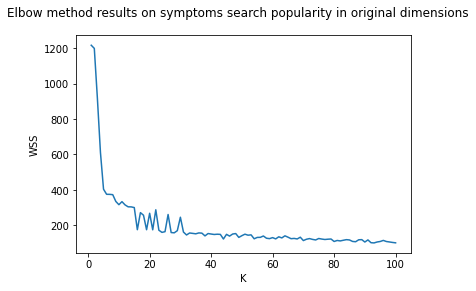

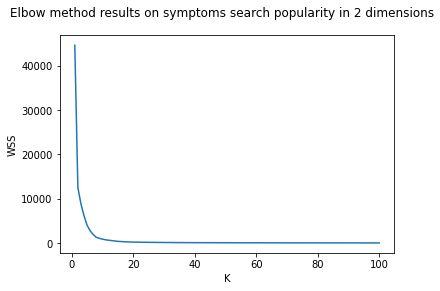

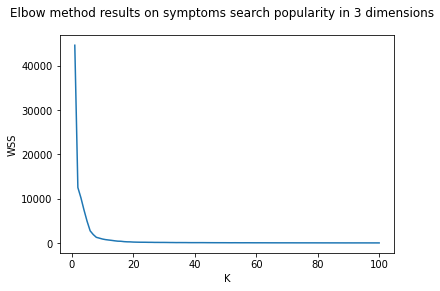

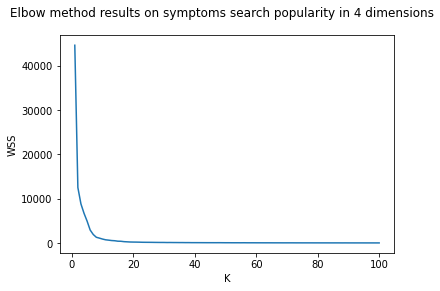

In [23]:
dataset = Data()
dataset.filter_out_zeros()
dataset.fill_na(0)
symptoms = dataset.d.columns[8:-1]
symptom_data = dataset.d.loc[:,symptoms].values
symptom_data = StandardScaler().fit_transform(symptom_data)

elbow_graphs(symptom_data, "original")

pca_data = PCAPlotting(dataset.d)
reduced_2d = pca_data.reduce_dimensionality(2)
elbow_graphs(reduced_2d, "2")

reduced_3d = pca_data.reduce_dimensionality(3)
elbow_graphs(reduced_3d, "3")

reduced_4d = pca_data.reduce_dimensionality(4)
elbow_graphs(reduced_4d, "4")

In [24]:
def silhouette_method(x, kmax):
    sil = []
    for k in range(2, kmax + 1):
        print(k)
        kmeans = KMeans(n_clusters=k).fit(x)
        labels = kmeans.labels_
        sil.append(silhouette_score(x, labels, metric='euclidean'))
    return sil

In [11]:
def intersect(a, b):
    """ return the intersection of two lists """
    return list(set(a) & set(b))

def consistency(num_clust, labels_high_dim, labels_low_dim):

        list1 = []
        list2 = []
        for i in range(num_clust):
            list1.append([])
            list2.append([])
        for i in range(len(labels_high_dim)):
            list1[labels_high_dim[i]].append(i)

        for i in range(len(labels_low_dim)):
            list2[labels_low_dim[i]].append(i)

        intersec = []

        for j in range(len(list1)):
            for k in range(len(list2)):
                intersec.append((len(intersect(list1[j], list2[k])), (j, k)))
        percentage_intersec = []
        for i in range(num_clust):
            if len(intersec) != 0:
                maximum = max(intersec)
                coord = maximum[1]
                mean_lists_length = (len(list1[coord[0]]) + len(list2[coord[1]])) / 2
                percentage_intersec.append((maximum[0] / mean_lists_length) * 100)
                intersec.remove(max(intersec))
        return (percentage_intersec, sum(percentage_intersec) / len(percentage_intersec))

In [20]:
def get_consistency(dimension, num_clusters):
    dataset = Data()
    dataset.filter_out_zeros()
    dataset.fill_na(0)
    symptoms = dataset.d.columns[8:-1]
    symptom_data = dataset.d.loc[:,symptoms].values
    symptom_data = StandardScaler().fit_transform(symptom_data)

    kmeans_original = Kmeans(symptom_data)
    labels_original_dim = kmeans_original.find_clusters(num_clusters)

    pca_data = PCAPlotting(dataset.d)
    reduced_xd = pca_data.reduce_dimensionality(dimension)
    kmeans_xd = Kmeans(reduced_xd)
    labels_x_dim = kmeans_xd.find_clusters(num_clusters)

    consistency_xd = consistency(num_clusters, labels_original_dim, labels_x_dim)
    print("{ Percentage of points falling in the same cluster together again = ",
          consistency_xd[1], "\nwith dimensions reduced to ", dimension, " and number of clusters = ",
          num_clusters, " }\n\n")

In [24]:
get_consistency(2, 15)
get_consistency(3, 15)
#Optimal number of PCs
get_consistency(6, 15)




<ipython-input-24-4c2ca46b6d10>:1: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  get_consistency(2, 15)
<ipython-input-24-4c2ca46b6d10>:2: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  get_consistency(3, 15)
<ipython-input-24-4c2ca46b6d10>:4: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  get_consistency(6, 15)


{ Percentage of points falling in the same cluster together again =  87.94508212349793 
with dimensions reduced to  2  and number of clusters =  15  }
{ Percentage of points falling in the same cluster together again =  81.57029460762202 
with dimensions reduced to  3  and number of clusters =  15  }
{ Percentage of points falling in the same cluster together again =  98.12032192044843 
with dimensions reduced to  6  and number of clusters =  15  }
